<a href="https://colab.research.google.com/github/ShivinM-17/PyTorch-practices/blob/main/PyTorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Custom datasets

Here, we get our own data into PyTorch.
These are called custom datasets.

**DOMAIN LIBRARIES**

There are specific domain pytorch libraries present (text, image, text, recommendation, audio, etc.) for us to use

### Importing PyTorch and setting up device-agnostic code

In [ ]:
import torch
from torch import nn

# Get pytorch version
print(torch.__version__)

2.1.0+cu121


In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get Data

Here, the dataset will be the subset of the Food101 dataset.

Food101 starts with 101 different classes food and 1000 images per class (750 training, 250 testing)

Our dataset starts with 3 classes of food and only 10% of the images (~75 training images, 25 testing images)

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists ... skipping download")
else:
  print(f"{image_path} does not exist ... creating one")
  image_path.mkdir(parents = True, exist_ok = True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak and sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data....")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exist ... creating one
Unzipping pizza, steak and sushi data....


#### Becoming one with the data (data preparation and data exploration)

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'


In [ ]:
# Setup training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#### Visualising the data

Writing some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, we'll process them using PIL module
5. Show the images and their metadata

Random image path: data/pizza_steak_sushi/test/pizza/930553.jpg
Image class: pizza
Image height: 512
Image width: 306


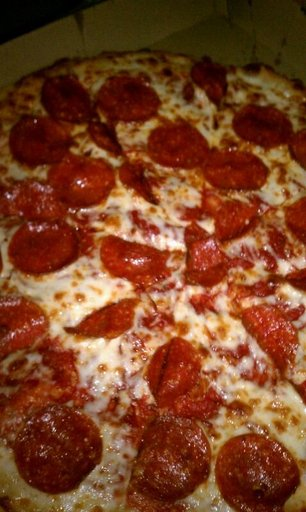

In [ ]:
import random
from PIL import Image

# Set the seed
# random.seed(42)

# 1. Get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# 3. Get the image class from path name (image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# print(image_class)

# 3. Open image
img = Image.open(random_image_path)
# print(img)

# 4. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

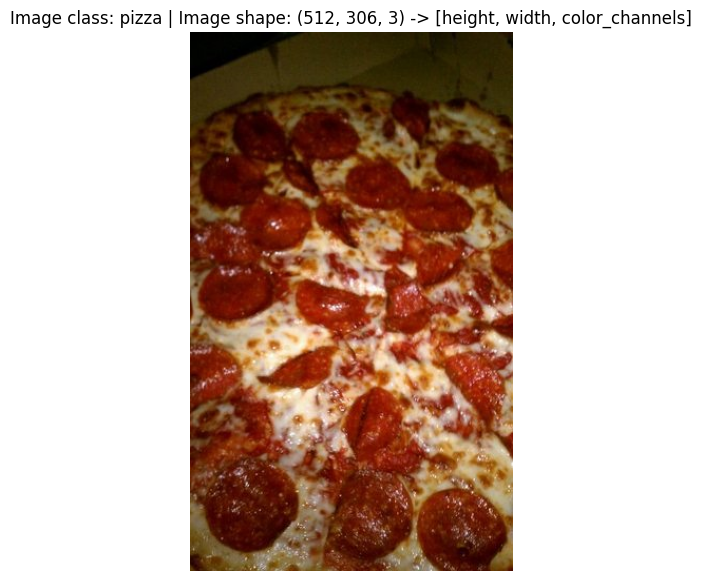

In [ ]:
# Plotting the image using matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [ ]:
img_as_array / 255.

array([[[0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        ...,
        [0.14117647, 0.07058824, 0.02352941],
        [0.1372549 , 0.08235294, 0.03137255],
        [0.13333333, 0.08627451, 0.02352941]],

       [[0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        ...,
        [0.1254902 , 0.05490196, 0.01568627],
        [0.1254902 , 0.0745098 , 0.01176471],
        [0.12156863, 0.07843137, 0.00784314]],

       [[0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        ...,
        [0.12156863, 0.05490196, 0.01568627],
        [0.14117647, 0.09411765, 0.03137255],
        [0.13333333, 0.10196078, 0.01960784]],

       ...,

       [[0.34117647, 0.21960784, 0.03921569],
        [0.34509804, 0.22352941, 0.05098039],
        [0.31372549, 0

### Transforming data

Before we can use the image data with PyTorch:
1. Turn the target into tensors (numerical representation of the images)
2. Turn it intoa `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`.



In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#### Transforming data with `torchvision.transforms`

Transforms helps you get iamges ready to be used with the model

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize the images to 64 * 64
    transforms.Resize(size = (64, 64)),
    # Flip the images randomnly on the horizontal
    transforms.RandomHorizontalFlip(p = 0.5),
    # Flip the images randomnly on the vertically
    transforms.RandomVerticalFlip(p = 0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

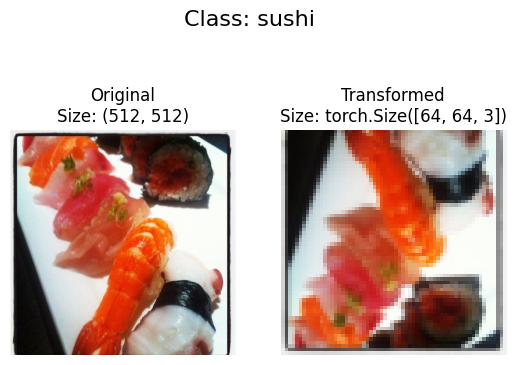

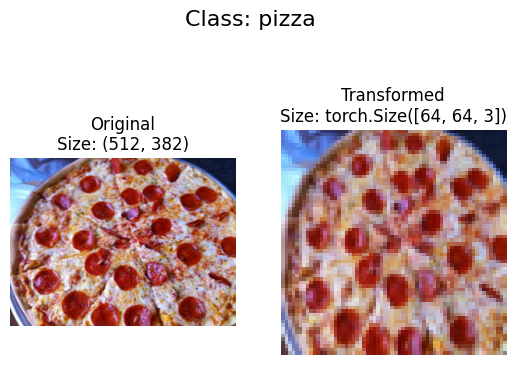

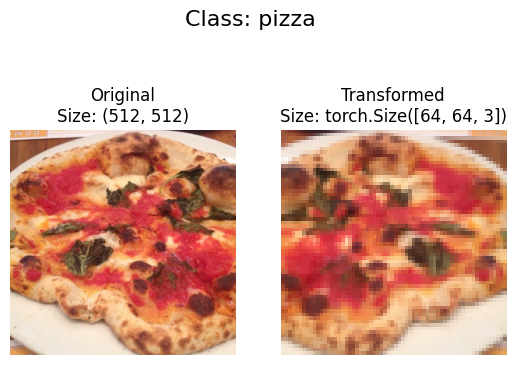

In [ ]:
def plot_transformed_images(image_paths:list, transform, n = 3, seed = None):
  """
  Selects random images froma  path of images and loads / transforms them
  then plots the original Vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0)  # note we will nedd to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths=image_path_list,
                        transform = data_transform,
                        n = 3)

### Option 1: Loading image data to image datasets

We can load image classification data using 'torchvision.datasets.ImageFolder'

In [ ]:
# Use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,  # a transform for the data
                                  target_transform = None, # a transform for the labels/target
                                  )
test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get classes names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
 # Check the lengths of the dataset
 len(train_data), len(test_data)

(225, 75)

In [ ]:
# Index on the train_Data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [ ]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [ ]:
label, class_names[label]

(0, 'pizza')

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Permuted image shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]




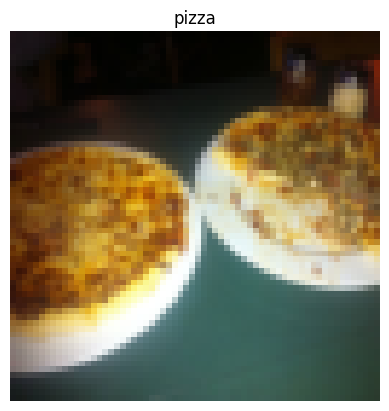

In [ ]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out the different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Permuted image shape: {img_permute.shape} -> [height, width, color_channels]\n\n")

# Plot the permuted image
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False);

#### Turn loaded image data to dataloaders and batch them

In [ ]:
import os
os.cpu_count()

2

In [ ]:
# Turn train and test datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 16
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,  # how many cpus to use for data loading
                              shuffle = True
                              )
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7df42bbf3b20>,
 <torch.utils.data.dataloader.DataLoader at 0x7df42ba78070>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [ ]:
img_lst, label = next(iter(train_dataloader))

print(f"Image shape: {img_lst.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([16, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([16])


### Option 2: Loading Image data with a Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset


**Pros**:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

**Cons**:
* Even though you could create a `Dataset` out of almost anything, it may not necessarily work.
* Using a custom `Dataset` often results in us writing more code, which is more prone to errors or performance issues

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format)
2. Raise an error if the class names aren't found. (if this happens, then there might be something wrong with the dataset)
3. Turn the class names into a fict and a list and return them.

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir()])

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check the file structure")

  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init the subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data
3. Create several attributes:
  * paths - paths of the images
  * transform - the transform we'd like to use
  * classes - a list of the target class
  * class_to_idx - a dict of the target classes mapped to interger labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of the dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index


In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize the custom dataset
  def __init__(self,
               target_dir: str,
               transform = None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(target_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "returns the total number of samples"
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name  # expects path in format: 'data_folder/class_name/image.jpg'
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx  # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [ ]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                     transform = test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7df3f8b932e0>,
 <__main__.ImageFolderCustom at 0x7df3f8b91390>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality between original ImageFolder dataset and CustomImage dataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


#### Creating a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, capping the number of images to see at 10.
3. Set the random seed for reproducibitily
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of the images line up with matplotlib (HWC)

In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purpose, n shouldn't be larger than 10, setting value of n to 10")

  # 3. Set the random seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_sample_indexes = random.sample(range(len(dataset)), k = n)

  # 5. Setup plt
  plt.figure(figsize = (16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_sample_indexes):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # Convert from CHW -> HWC

    # Plot adjusted samples
    plt.subplot(1, n, i + 1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)

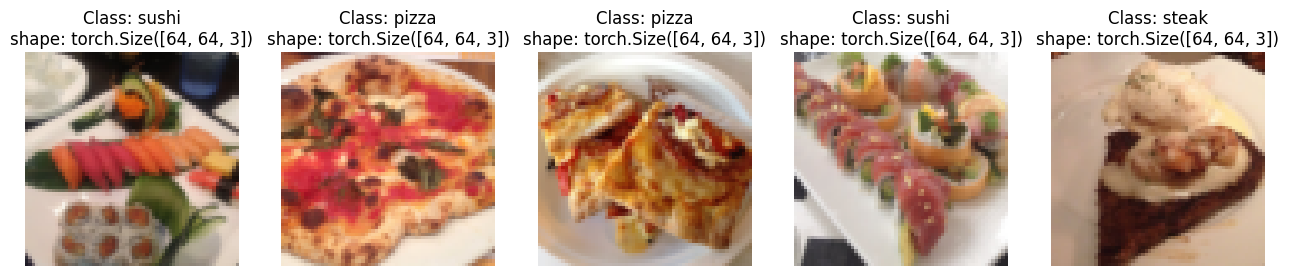

In [ ]:
# Display random images from the ImageFolder created dataset
display_random_images(train_data,
                      n = 5,
                      classes = class_names,
                      seed = None)

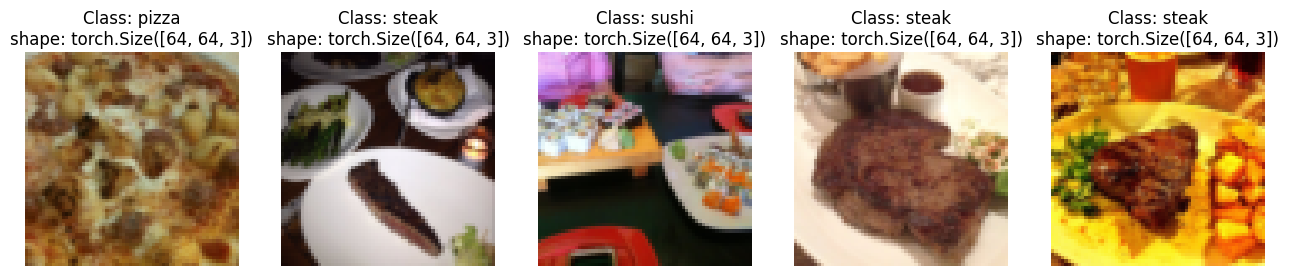

In [ ]:
# Display random images from ImageFolderCustom dataset
display_random_images(train_data_custom,
                      n = 5,
                      classes = class_names,
                      seed = None)

#### Turn custom loaded images into DataLoaders

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)
test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = NUM_WORKERS,
                                    shuffle = False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7df3f88378e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7df3f8837010>)

In [ ]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([16, 3, 64, 64]), torch.Size([16]))

### Other forms of augmentation (data augmentation)

Data augmentation is the process of artificially adding diversity to the training data.

In case of image data, this may mean applying various image transformations to the training images.

Now, taking a look at one particular type of data augmentation used to train PyTorch vision models to state of the art models....

In [ ]:
# Performing TrivialAugment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (224 ,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224 ,224)),
    transforms.ToTensor()
])

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/2785084.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/218711.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2291093.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/618348.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/741883.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1044789.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/244505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2154394.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2190018.jpg')]

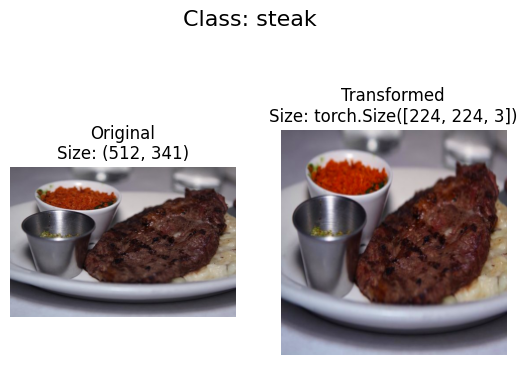

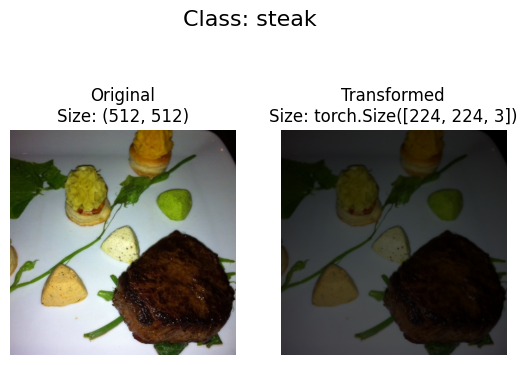

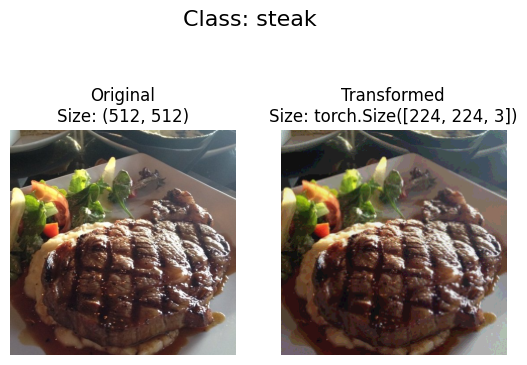

In [ ]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n = 3,
    seed = None
)

### Model 0: TinyVGG without data augmentation (Baseline model)

Replicating TinyVGG architecture from the CNN Explainer

#### Creating transforms and loading data for Model 0

In [ ]:
# Create simple transforms
simple_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

In [ ]:
# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create dataloaders
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle =True)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = False)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7df3f8d3db10>,
 <torch.utils.data.dataloader.DataLoader at 0x7df3f8d3c820>)

#### Create TinyVGG model

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*256,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))  # benefits from operation fusion

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

#### Trying a forward pass on single image (to test the model)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Trying a forward pass
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

#### Use `torchinfo` to get summary of the model

In [ ]:
# Install torchinfo, import it it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

#### Create train and test loops functions

* `train_step()` - takes in a model and a dataloader and trains the model on the dataloader
* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader

In [ ]:
# Create the train_step() function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through the dataloader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send the data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metrics
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
    train_acc += (y_pred_class==y).sum().item() / len(y_pred)

  # Adjust the metrics to get average loss and accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create the test step function
def test_step(model:torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # Put the model in eval model
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference model
  with torch.inference_mode():
    # Loop through the data
    for batch, (X, y) in enumerate(dataloader):
      # Put the data into the device
      X, y = X.to(device), y.to(device)

      # Do the forward pass
      test_pred_logits = model(X)

      # Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim = 1)
      test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels)

  # Adjust the metrics to get average of the loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)
  return test_loss, test_acc

In [ ]:
device

'cuda'

#### Creating `train()` function to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5,
          device = device):

  # 2. Create empty results dictionary
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)

    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)

    # 4. Print put what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  # 6. Return the overall metrics we got from the model
  return results

#### Train and evaluate model_0

In [ ]:
# Set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setup number of epochs
NUM_EPOCHS = 20

# Recreate an instance of the TinyVGG model
model_0 = TinyVGG(input_shape = 3,  # number of color channels of the target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1078 | Train acc: 0.2578 | Test loss: 1.1362 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0846 | Train acc: 0.4258 | Test loss: 1.1622 | Test acc: 0.1979
Epoch: 2 | Train loss: 1.1153 | Train acc: 0.2930 | Test loss: 1.1694 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.0993 | Train acc: 0.2891 | Test loss: 1.1338 | Test acc: 0.1979
Epoch: 4 | Train loss: 1.0989 | Train acc: 0.2930 | Test loss: 1.1435 | Test acc: 0.1979
Epoch: 5 | Train loss: 1.0964 | Train acc: 0.3086 | Test loss: 1.1483 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.1185 | Train acc: 0.3281 | Test loss: 1.1419 | Test acc: 0.3125
Epoch: 7 | Train loss: 1.1009 | Train acc: 0.3672 | Test loss: 1.1037 | Test acc: 0.2188
Epoch: 8 | Train loss: 1.0877 | Train acc: 0.4922 | Test loss: 1.0648 | Test acc: 0.5417
Epoch: 9 | Train loss: 1.0652 | Train acc: 0.4023 | Test loss: 1.0150 | Test acc: 0.5417
Epoch: 10 | Train loss: 1.0419 | Train acc: 0.4219 | Test loss: 0.9774 | Test acc: 0.6042
Epoch: 11 | Train lo

In [ ]:
model_0_results

{'train_loss': [1.1078356802463531,
  1.084643691778183,
  1.1153187602758408,
  1.0992623716592789,
  1.0989203751087189,
  1.0963549762964249,
  1.1185458898544312,
  1.1008926630020142,
  1.087740197777748,
  1.0651972591876984,
  1.0418588742613792,
  1.139976978302002,
  1.0435872599482536,
  0.9603809043765068,
  0.8949333280324936,
  0.7936433851718903,
  0.8300683349370956,
  0.8536104112863541,
  0.8188585564494133,
  1.043498232960701],
 'train_acc': [0.2578125,
  0.42578125,
  0.29296875,
  0.2890625,
  0.29296875,
  0.30859375,
  0.328125,
  0.3671875,
  0.4921875,
  0.40234375,
  0.421875,
  0.40625,
  0.4453125,
  0.515625,
  0.6015625,
  0.65625,
  0.6640625,
  0.5703125,
  0.59375,
  0.53125],
 'test_loss': [1.1362075408299763,
  1.1621665159861247,
  1.169421672821045,
  1.133804162343343,
  1.1435432434082031,
  1.148250659306844,
  1.1418668031692505,
  1.1037118037541707,
  1.064839760462443,
  1.0150488416353862,
  0.9774384299914042,
  0.9918605287869772,
  1.0304

#### Plot the loss curves of Model_0

A **loss_curve** is a way of tracking the model's progress over time.

In [ ]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """
  Plots training curves of a results dictionary
  """
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results['train_acc']
  test_acc = results["test_acc"]

  # Figure out number of epochs present
  epochs = range(len(results['train_loss']))

  # Setup a plot
  plt.figure(figsize=(10, 4))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label = "test_loss")
  plt.title("Loss Curves of the model")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label = 'train_accuracy')
  plt.plot(epochs, test_acc, label = 'test_accuracy')
  plt.title("Accuracy curve of the model")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend();

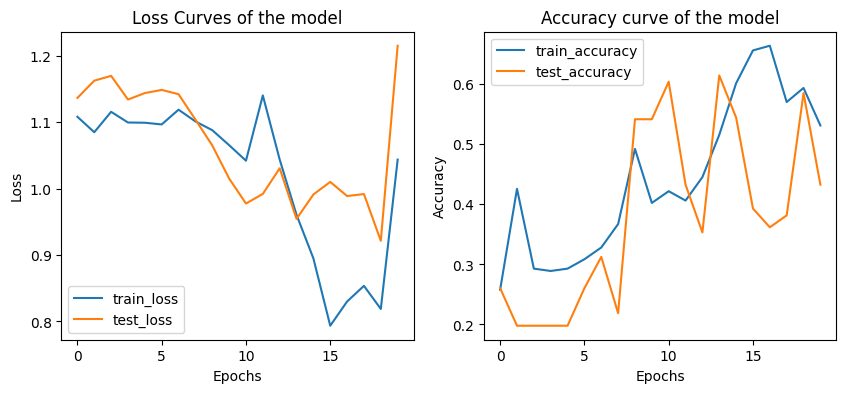

In [ ]:
plot_loss_curves(results = model_0_results)

### What should a ideal loss curve look like?

A loss curve is one of the most useful ways

### Model 1: TinyVGG with Data Augmentation

Trying another modelling experiment using the same model as before but with some data augmentation.





#### Create transform with data transform

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_transform_trivial, test_transform_trivial

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ))

#### Create train and test `Datasets` and `DataLoader` with data augmentation

In [ ]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transform_trivial)

test_data_augmented = datasets.ImageFolder(root = test_dir,
                                           transform = test_transform_trivial)

In [ ]:
# Turn the datasets into Dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                       batch_size = BATCH_SIZE,
                                       shuffle = False,
                                       num_workers = NUM_WORKERS)

#### Construct and train model_1

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 20

# Setup loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

In [ ]:
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)
# End the timer
end_time = timer()
print(f"Total training time: {end_time - start_time : .4f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1076 | Train acc: 0.2500 | Test loss: 1.1062 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0791 | Train acc: 0.4258 | Test loss: 1.1387 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0810 | Train acc: 0.4258 | Test loss: 1.1695 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.1292 | Train acc: 0.3047 | Test loss: 1.1624 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0901 | Train acc: 0.4258 | Test loss: 1.1477 | Test acc: 0.2604
Epoch: 5 | Train loss: 1.0969 | Train acc: 0.3047 | Test loss: 1.1450 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.0916 | Train acc: 0.4531 | Test loss: 1.1464 | Test acc: 0.1979
Epoch: 7 | Train loss: 1.1016 | Train acc: 0.2930 | Test loss: 1.1510 | Test acc: 0.1979
Epoch: 8 | Train loss: 1.1207 | Train acc: 0.2930 | Test loss: 1.1440 | Test acc: 0.1979
Epoch: 9 | Train loss: 1.0968 | Train acc: 0.2930 | Test loss: 1.1118 | Test acc: 0.1979
Epoch: 10 | Train loss: 1.0937 | Train acc: 0.4180 | Test loss: 1.1087 | Test acc: 0.2604
Epoch: 11 | Train lo

#### Plot the loss curves of model_1

A loss_curve helps us to evaluate your models performance overtime.

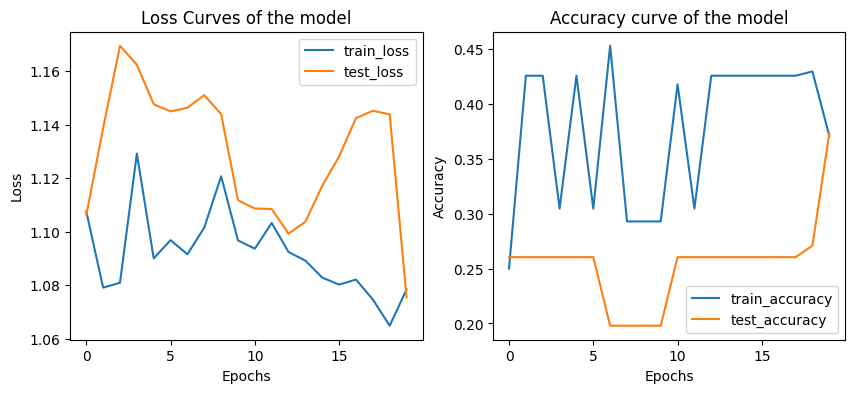

In [ ]:
plot_loss_curves(model_1_results)

### Compare model results

After evaluating our modelling experiments on their own, it's important to compare them to each other.

There's a few different ways to do this:
1. Hard coding
2. PyTorch + Tensorboard
3. Weights & Biases
4. MLFlow



In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.136208,0.260417
1,1.084644,0.425781,1.162167,0.197917
2,1.115319,0.292969,1.169422,0.197917
3,1.099262,0.289062,1.133804,0.197917
4,1.098920,0.292969,1.143543,0.197917
5,1.096355,0.308594,1.148251,0.260417
6,1.118546,0.328125,1.141867,0.312500
7,1.100893,0.367188,1.103712,0.218750
8,1.087740,0.492188,1.064840,0.541667
9,1.065197,0.402344,1.015049,0.541667


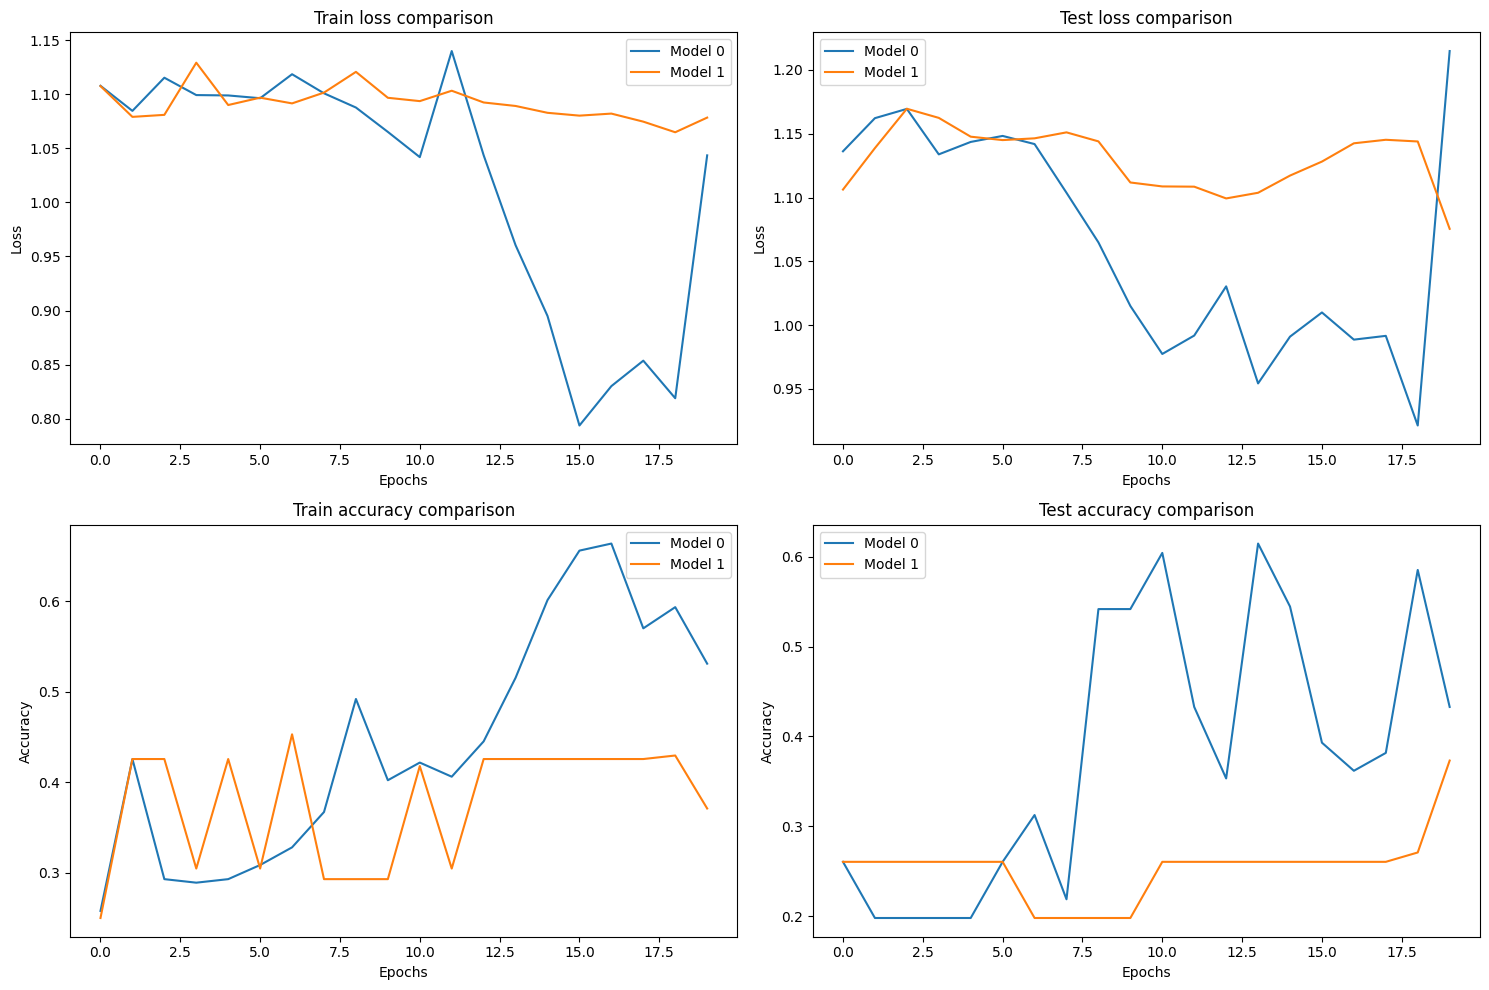

In [ ]:
# Setup a plot
plt.figure(figsize = (15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test loss comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test accuracy comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

plt.tight_layout()

### Making a prediction on custom image

Although we've trained a model on custom data... how do you make prediction on some other custom data

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from GitHub, need to use the "raw data"
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}....")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download....")

#### Loading in a custom image with PyTorch

We have to make sure our custom image is **in** the same format as the data our model was trained on.
* In tensor form with datatype (torch.float32)
* Of shape 64 x 64 x 3
* On the right device

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image data

(-0.5, 3023.5, 4031.5, -0.5)

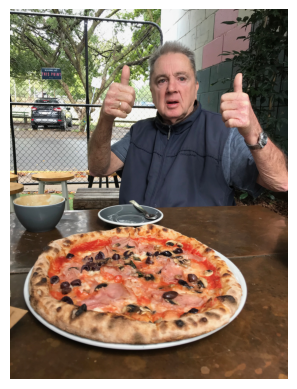

In [ ]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.axis(False);

#### Making a prediction on a custom image with a trained PyTorch model

In [ ]:
# Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
# Load in the image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
custom_image.shape

torch.Size([3, 4032, 3024])

In [ ]:
# Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x762048 and 2560x3)

In [ ]:
# Create transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Tranformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
Tranformed shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


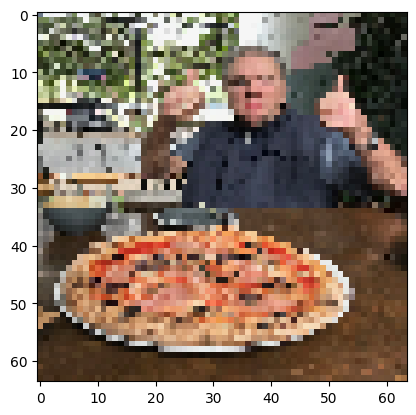

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [ ]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [ ]:
# Adding a batch dimension to the image
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[-0.0573,  0.1622, -0.0679]], device='cuda:0')

**NOTE**

To make prediction on a custom image, we have to:
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trained on (3, 64, 64) with a batch_size (1, 3, 64, 64)
* Make sure the image was on the same device as the model

In [ ]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim = 1)
custom_image_pred_probs

tensor([[0.3091, 0.3850, 0.3059]], device='cuda:0')

In [ ]:
# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim = 1).cpu()
custom_image_pred_label

tensor([1])

In [ ]:
class_names[custom_image_pred_label]

'steak'

#### Putting custom image prediction together : Building a function

Ideal outcome:

A function where we pass an image path to and have the model predict on that image and plot the image + prediction

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                         image_path: str,
                         class_names: List[str] = None,
                         transform = None,
                         device = device):
  """
  Makes a prediction on a target image with a trained model and plots the image and prediction
  """
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between (0, 1)
  target_image = target_image / 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on the eval / inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on the image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device))

  # Convert the logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)

  # Plot the image alongside the prediction and prediction probabilities
  plt.imshow(target_image.squeeze().permute(1, 2, 0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False);


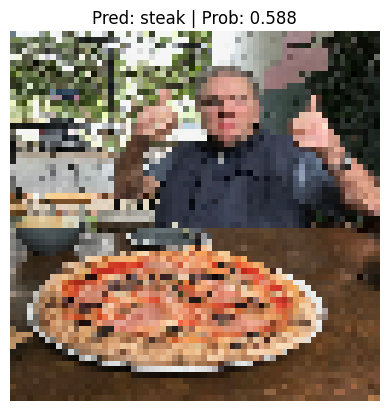

In [ ]:
# Pred on the custom image
pred_and_plot_image(model = model_0,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device = device
                    )